# Bagging Ensemble

In [34]:
import numpy as np
import pandas as pd

In [35]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df = df.iloc[:,1:]

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
encoder = LabelEncoder()

In [39]:
df['Species'] = encoder.fit_transform(df['Species'])

In [40]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

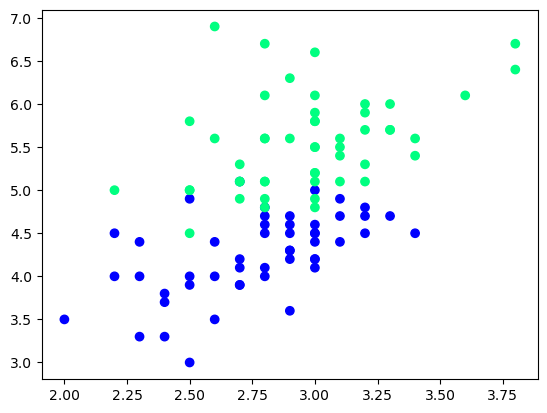

In [42]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [43]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [44]:
df_train

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
87,2.3,4.4,1
138,3.0,4.8,2
95,3.0,4.2,1
117,3.8,6.7,2
98,2.5,3.0,1
97,2.9,4.3,1
60,2.0,3.5,1
79,2.6,3.5,1
91,3.0,4.6,1


In [45]:
df_val

,SepalWidthCm,PetalLengthCm,Species
66,3.0,4.5,1
71,2.8,4.0,1
59,2.7,3.9,1
53,2.3,4.0,1
132,2.8,5.6,2


In [46]:
df_test

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
63,2.9,4.7,1
105,3.0,6.6,2
76,2.8,4.8,1
65,3.1,4.4,1


In [47]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

### Bagging

In [48]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
60,2.0,3.5,1
67,2.7,4.1,1
79,2.6,3.5,1
98,2.5,3.0,1
117,3.8,6.7,2
117,3.8,6.7,2
67,2.7,4.1,1
60,2.0,3.5,1


In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [50]:
dt_bag1 = DecisionTreeClassifier()

In [51]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

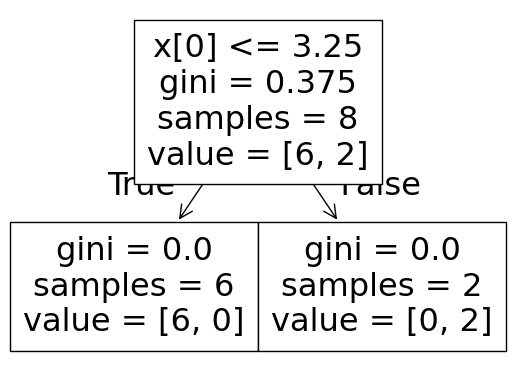

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


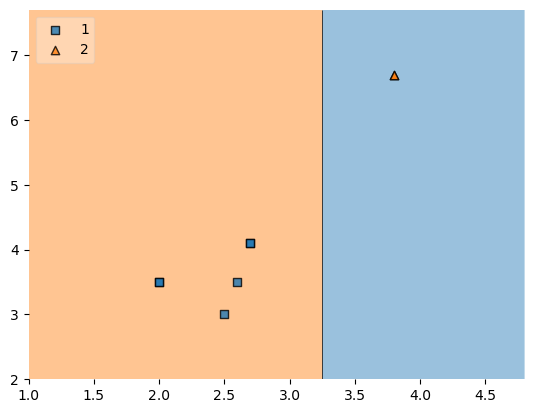

In [52]:
evaluate(dt_bag1,X,y)

In [53]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
98,2.5,3.0,1
138,3.0,4.8,2
97,2.9,4.3,1
79,2.6,3.5,1
79,2.6,3.5,1
117,3.8,6.7,2
138,3.0,4.8,2
87,2.3,4.4,1


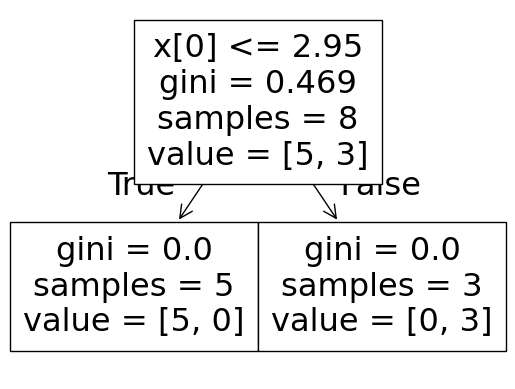

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


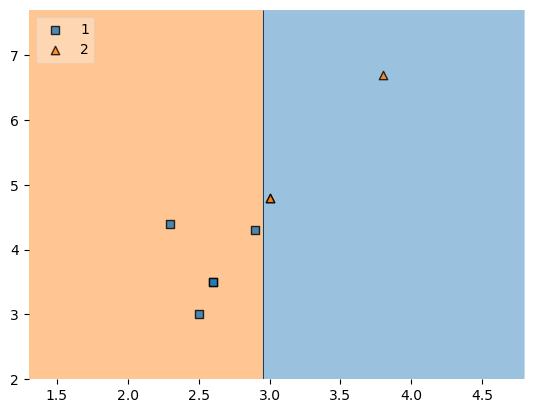

In [54]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [55]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
138,3.0,4.8,2
91,3.0,4.6,1
91,3.0,4.6,1
87,2.3,4.4,1
95,3.0,4.2,1
67,2.7,4.1,1
67,2.7,4.1,1
87,2.3,4.4,1


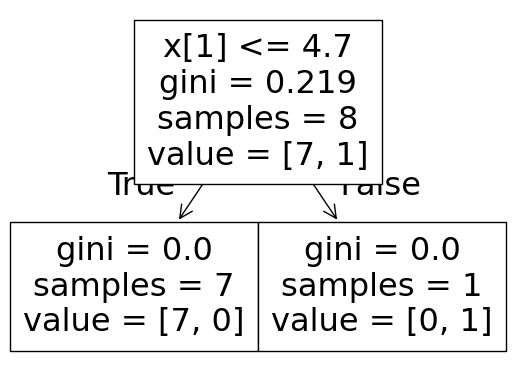

c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


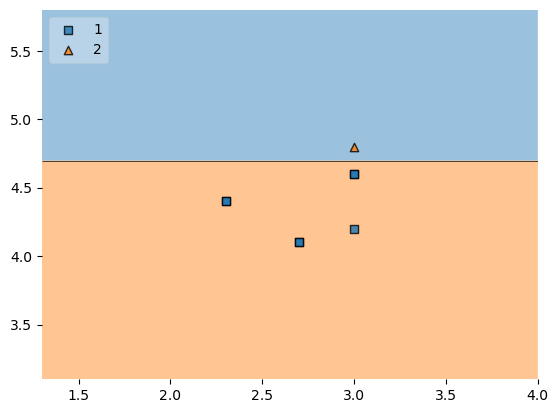

In [56]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

### Predict

In [57]:
df_test

,SepalWidthCm,PetalLengthCm,Species
100,3.3,6.0,2
63,2.9,4.7,1
105,3.0,6.6,2
76,2.8,4.8,1
65,3.1,4.4,1


In [60]:
print("Predictor 1",dt_bag1.predict(np.array([2.9,4.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.9,4.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.9,4.7]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\uzebk\miniconda3\envs\dsenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Pasting

In [61]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
67,2.7,4.1,1
87,2.3,4.4,1
138,3.0,4.8,2
95,3.0,4.2,1
117,3.8,6.7,2
98,2.5,3.0,1
97,2.9,4.3,1
60,2.0,3.5,1
79,2.6,3.5,1
91,3.0,4.6,1


In [62]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
95,3.0,4.2,1
67,2.7,4.1,1
60,2.0,3.5,1
117,3.8,6.7,2
98,2.5,3.0,1
91,3.0,4.6,1
87,2.3,4.4,1


### Random Subspaces

In [68]:
df1 = pd.read_csv('iris.csv')
df1 = df1.sample(10)

In [67]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
76,77,6.8,2.8,4.8,1.4,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
140,141,6.7,3.1,5.6,2.4,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
41,42,4.5,2.3,1.3,0.3,Iris-setosa


In [70]:
df1.sample(2,replace=True,axis=1)

,PetalLengthCm,PetalWidthCm
64,3.6,1.3
5,1.7,0.4
16,1.3,0.4
136,5.6,2.4
79,3.5,1.0
133,5.1,1.5
50,4.7,1.4
31,1.5,0.4
52,4.9,1.5
61,4.2,1.5


### Random Patches

In [71]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
5,6,5.4,3.9,1.7,0.4,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
133,134,6.3,2.8,5.1,1.5,Iris-virginica
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
31,32,5.4,3.4,1.5,0.4,Iris-setosa
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
61,62,5.9,3.0,4.2,1.5,Iris-versicolor


In [72]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,Species,PetalWidthCm
50,Iris-versicolor,1.4
52,Iris-versicolor,1.5
61,Iris-versicolor,1.5
16,Iris-setosa,0.4
79,Iris-versicolor,1.0
31,Iris-setosa,0.4
16,Iris-setosa,0.4
5,Iris-setosa,0.4


## Bagging Classifier

In [73]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [74]:
X,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.8735


### Bagging

In [78]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.5,
    bootstrap=True,
    random_state=42
)

In [79]:
bag.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,0.5
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [80]:
y_pred = bag.predict(X_test)

In [81]:
accuracy_score(y_test,y_pred)

0.9165

In [82]:
bag.estimators_samples_[0].shape

(4000,)

In [83]:
bag.estimators_features_[0].shape

(10,)

### Bagging using SVM

In [84]:
bag = BaggingClassifier(
    estimator=SVC(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    random_state=42
)

In [85]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM",accuracy_score(y_test,y_pred))

Bagging using SVM 0.8765


### Pasting

In [87]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=False,
    random_state=42,
    verbose = 1,
    n_jobs=-1
)

In [88]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    9.5s remaining:  1.1min
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    9.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.0s remaining:    0.3s


Pasting classifier 0.917


[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.1s finished


### Random Subspaces

In [90]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=False,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)

In [91]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.9005


In [93]:
bag.estimators_samples_[0].shape

(8000,)

In [92]:
bag.estimators_features_[0].shape

(5,)

### Random Patches

In [95]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    max_features=0.5,
    bootstrap_features=True,
    random_state=42,
    n_jobs=-1
)

In [96]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.9


# OOB Score

In [97]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,
    max_samples=0.25,
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)

In [98]:
bag.fit(X_train,y_train)

,estimator,DecisionTreeClassifier()
,n_estimators,500
,max_samples,0.25
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,True
,warm_start,False
,n_jobs,-1
,random_state,42
,verbose,0


In [99]:
bag.oob_score_

0.914125

In [100]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9145


# Bagging Tips

- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

# Applying GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV

In [106]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0],
    'n_jobs': [-1]
    }

In [107]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5)

In [108]:
search.fit(X_train,y_train)

,estimator,BaggingClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_features': [0.1, 0.4, ...], 'max_samples': [0.1, 0.4, ...], 'n_estimators': [50, 100, ...], ...}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,estimator,None


In [109]:
search.best_params_
search.best_score_

np.float64(0.91375)

In [110]:
search.best_params_

{'bootstrap': False,
 'max_features': 0.7,
 'max_samples': 0.4,
 'n_estimators': 500,
 'n_jobs': -1}

# Bagging Regressor

In [111]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X_diabetes, Y_diabetes = diabetes.data, diabetes.target
print('Dataset features names : '+ str(diabetes.feature_names))
print('Dataset features size : '+ str(diabetes.data.shape))
print('Dataset target size : '+ str(diabetes.target.shape))

Dataset features names : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset features size : (442, 10)
Dataset target size : (442,)


In [112]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [113]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes, train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (353, 10) (89, 10) (353,) (89,)


In [114]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [115]:
lr.fit(X_train,Y_train)
dt.fit(X_train,Y_train)
knn.fit(X_train,Y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [116]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [117]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.5675895725793205
R^2 score for DT 0.18542917101855505
R^2 score for KNN 0.438839665879189


In [118]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

,estimator,None
,n_estimators,10
,max_samples,1.0
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,1
,verbose,0


In [119]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.897
Test Coefficient of R^2 : 0.499


In [121]:
%%time

n_samples = diabetes.data.shape[0]
n_features = diabetes.data.shape[1]

params = {'estimator': [None, LinearRegression(), KNeighborsRegressor()],
            'n_estimators': [20,50,100],
            'max_samples': [0.5,1.0],
            'max_features': [0.5,1.0],
            'bootstrap': [True, False],
            'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.487
Test R^2 Score : 0.533
Best R^2 Score Through Grid Search : 0.446
Best Parameters :  {'bootstrap': False, 'bootstrap_features': True, 'estimator': LinearRegression(), 'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 100}
CPU times: total: 1.45 s
Wall time: 18.7 s
